# <center> CSE480 Machine Vision
### <center> Milestone 1
### <center> 19P6038 Ali Ahmed Ali Ahmed


# Imports

In [1]:
import cv2
from skimage.feature import hog
from skimage.transform import resize
from PIL import Image, ImageOps
import os
import numpy as np
from numpy import linalg
import sys
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from statistics import mode
import random
%matplotlib inline

# HOG Features

### HOG Features Function, resizing the image and returns the feature vector & hog image

In [2]:
def HOG_features(img_i):
    resized = cv2.resize(img_i,(128,128))
    feature_vector, hog_image = hog(resized, orientations= 9,
                                    pixels_per_cell = (8, 8),
                                    cells_per_block = (2, 2),
                                    visualize = True,
                                    channel_axis= -1)
    return feature_vector, hog_image


### Metrics Calculation function for calculating accuracy and confusion matrix

In [3]:
def Calculate_metrics(Actual_labels, Predicted_labels):
    Accuracy = metrics.accuracy_score(Actual_labels, Predicted_labels)
    confusion_matrix = metrics.confusion_matrix(Actual_labels, Predicted_labels)
    print("Confusion Matrix: \n", confusion_matrix)
    print("Accuracy:", Accuracy)
    plt.imshow(confusion_matrix)
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Labels")
    plt.xlabel("Predicted Labels")
    plt.colorbar()
    plt.show

### Function for image showing

In [4]:
def cv2_images_show(column, *imgs):
    row = math.ceil(len(imgs)/column)
    plt.figure(figsize=(column*5, row*4))
    for i,img in enumerate(imgs):
        if type(img)==type(None):
            break
        if len(img.shape)==3:  #BGR
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(row, column, i+1)
            plt.imshow(img_rgb)
        elif len(img.shape)==2:  #GRAY
            plt.subplot(row, column, i+1)
            plt.imshow(img, 'gray')
    plt.show

## Loading Datasets

In [5]:
path = 'D:\ASU\Senior 2\CSE480 Machine Vision\Project\caltech-101'

input_path = []
classes = []
for dirname, _, filenames in os.walk(path):
    classes.append(_)
    for file in filenames:
        input_path.append(os.path.join(dirname, file))
classes = classes[0]
print(len(input_path))
print(len(classes))
print(classes)

9145
102
['accordion', 'airplanes', 'anchor', 'ant', 'BACKGROUND_Google', 'barrel', 'bass', 'beaver', 'binocular', 'bonsai', 'brain', 'brontosaurus', 'buddha', 'butterfly', 'camera', 'cannon', 'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile', 'crocodile_head', 'cup', 'dalmatian', 'dollar_bill', 'dolphin', 'dragonfly', 'electric_guitar', 'elephant', 'emu', 'euphonium', 'ewer', 'Faces', 'Faces_easy', 'ferry', 'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'gramophone', 'grand_piano', 'hawksbill', 'headphone', 'hedgehog', 'helicopter', 'ibis', 'inline_skate', 'joshua_tree', 'kangaroo', 'ketch', 'lamp', 'laptop', 'Leopards', 'llama', 'lobster', 'lotus', 'mandolin', 'mayfly', 'menorah', 'metronome', 'minaret', 'Motorbikes', 'nautilus', 'octopus', 'okapi', 'pagoda', 'panda', 'pigeon', 'pizza', 'platypus', 'pyramid', 'revolver', 'rhino', 'rooster', 'saxophone', 'schooner', 'scissors', 'scorpion', 'sea_horse', 'sn

### Hog Features extraction for random image

D:\ASU\Senior 2\CSE480 Machine Vision\Project\caltech-101\Motorbikes\image_0158.jpg
Feature Vector =  [0. 0. 0. ... 0. 0. 0.]
8100
Motorbikes


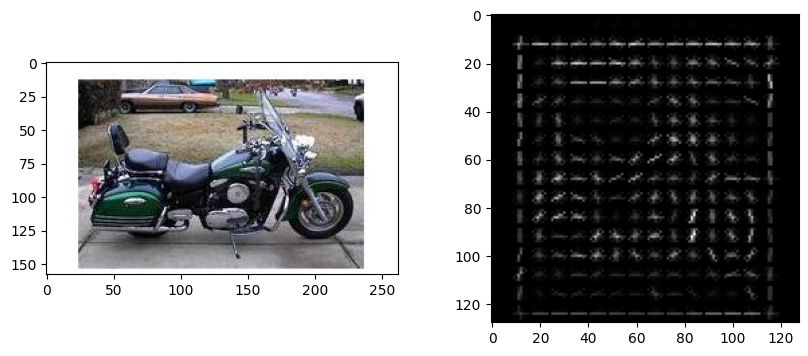

In [19]:
rand_number = random.randint(0, len(input_path))
image_cv = cv2.imread(input_path[rand_number])
print(input_path[rand_number])
label = input_path[rand_number].split('\\')[-2]
feature_vector, hog_image = HOG_features(image_cv)
print("Feature Vector = ", feature_vector)
print(len(feature_vector))
print(label)
cv2_images_show(2,image_cv, hog_image)

## Creating Features list and Labels list for all datasets

In [20]:
features_list = []
labels_list = []
for path in input_path:
    labels_list.append(path.split('\\')[-2])
    image = cv2.imread(path)
    features_list.append(HOG_features(image)[0])

In [21]:
print(len(features_list))
print(len(labels_list))

9145
9145


### Splitting the data to Training part and Testing part

In [22]:
# Dividing dataset into training and comparing
features_train, features_test, labels_train, labels_test = train_test_split(features_list,labels_list, test_size = 0.25)
print(len(features_train))
print(len(features_test))
print(len(labels_train))
print(len(labels_test))

6858
2287
6858
2287


# KNN

## K-Nearest Neighbor Function

In [23]:
def KNN(data, sample, k=3):
    x,y = np.array(data[0]), np.array(data[1])
    distances = np.array([])
    for i in x:
        distances = np.append(distances, linalg.norm(i-sample))
    #print('Distances of the first k elements = ', distances[:k])
    nearest_neighbor_indices = np.argsort(distances)[:k]
    #print('Distance of the Nearest k elements = ', distances[nearest_neighbor_indices])
    #print(nearest_neighbor_indices)
    nearest_labels = y[nearest_neighbor_indices]
    #print('The Nearest k Labels : ', nearest_labels)
    #print('The Label: ', mode(nearest_labels))
    return mode(nearest_labels)

## KNN Test on a sample image

Actual:  Motorbikes       KNN Prediction: Motorbikes


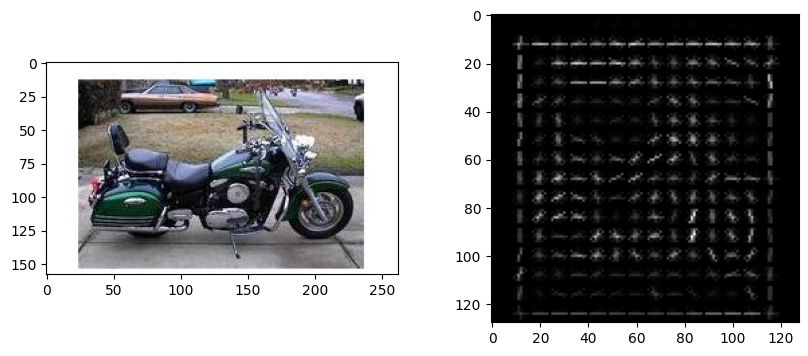

In [24]:
result = KNN([features_train, labels_train], feature_vector, k=3)
print('Actual: ', label, '      KNN Prediction:', result)
cv2_images_show(2, image_cv, hog_image)

## KNN Prediction for all Testing parts

In [25]:
KNN_predicted_list = []
for i, sample in enumerate(features_test):
    KNN_predicted_list.append(KNN([features_train, labels_train], sample, k = 3))
    print('\r', i+1, '/', len(features_test), ' ', end="")

 2287 / 2287  

## KNN Metrics and Confusion Matrix for all testing parts

Confusion Matrix: 
 [[ 29   0   0 ...   0   1   0]
 [  0  83   0 ...   0   0   0]
 [  0   2 106 ...   0   0   0]
 ...
 [  1   0   0 ...   6   0   0]
 [  0   0   0 ...   0   6   0]
 [  1   0   0 ...   0   0   6]]
Accuracy: 0.44687363358111065


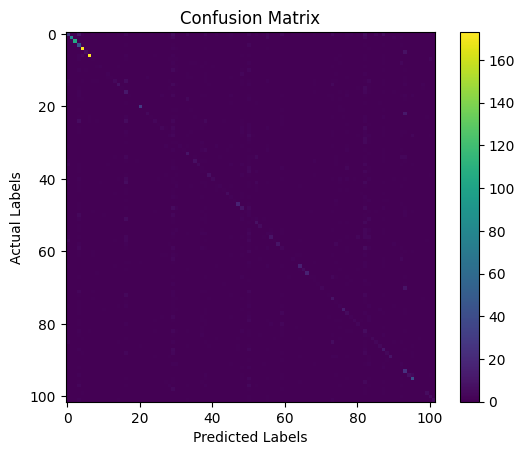

In [26]:
KNN_metrics = Calculate_metrics(labels_test, KNN_predicted_list)

# K-means

## K-means class

In [27]:
class Kmeans:
    def __init__(self,k):
        self.k=k
    
    # Function for fitting the clusters and get the center of each cluster
    def train(self,data):
        x,y = np.array(data[0]),np.array(data[1])
        clusters={}
        for i,j in enumerate(x):
            if y[i] not in clusters.keys():
                clusters[y[i]] = np.array([j])
            else:
                clusters[y[i]]=np.append(clusters[y[i]],[j],axis=0)
        self.centers=[]
        self.classes=np.array([])
        for i in sorted(clusters.keys()):
            self.centers.append(np.mean(clusters[i],axis=0))
            self.classes=np.append(self.classes,i)
        #print(self.centers)
        #print(len(self.centers[0]))
        #print(self.classes,len(self.classes))

    # Function for classifing feature vector using the centers
    def predict(self,sample):
        distances=np.array([])
        for i in self.centers:
            # print(len(i))
            distances=np.append(distances,linalg.norm(i-sample))
        #print(np.argmin(distances))
        #print(self.centers)
        #print(self.classes)
        return self.classes[np.argmin(distances)]

## Initialize K-means object and fit to the train list

In [28]:
kmeans=Kmeans(len(classes)) #number of clusters equal number of classes
kmeans.train([features_train,labels_train])

## K-Means Test on a sample image

Actual: Motorbikes      K-means Predicton: Motorbikes


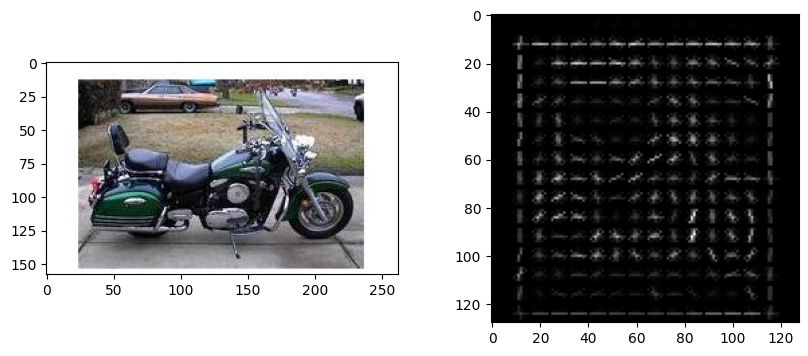

In [29]:
result=kmeans.predict(feature_vector)
print('Actual:',label,'     K-means Predicton:',result)
cv2_images_show(2,image_cv,hog_image)

## K-Means prediction for all testing part

In [30]:
kmeans_predicted_list=[]
for i,sample in enumerate(features_test):
    kmeans_predicted_list.append(kmeans.predict(sample))
    print('\r',i+1,'/',len(features_test),' ',end="")

 2287 / 2287  

## K-Means Metrics and Confusion matrix for all testing part

Confusion Matrix: 
 [[ 36   2   0 ...   0   4   0]
 [  0  93   0 ...   0   0   0]
 [  0   1 106 ...   0   0   0]
 ...
 [  0   0   0 ...   7   0   0]
 [  0   0   0 ...   0   6   0]
 [  0   0   0 ...   0   0   8]]
Accuracy: 0.5312636641888937


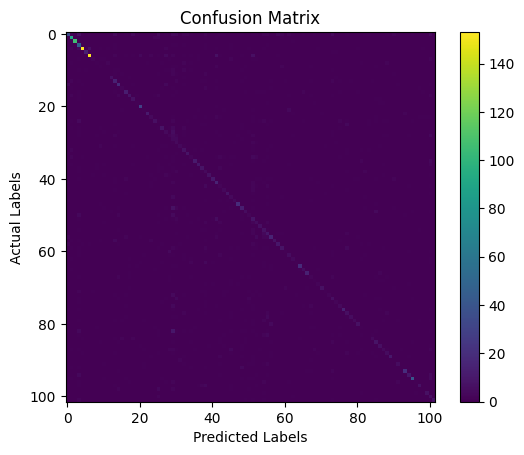

In [31]:
kmeans_metrics = Calculate_metrics(labels_test,kmeans_predicted_list)

# Support Vector Machine

## Initialize SVM classifer object and fit it into the train list

In [32]:
svm_classifier=svm.SVC()
svm_classifier.fit(features_train,labels_train)

SVC()

## SVM testing on a sample image

Actual: Motorbikes      SVM Predicton: ['Motorbikes']


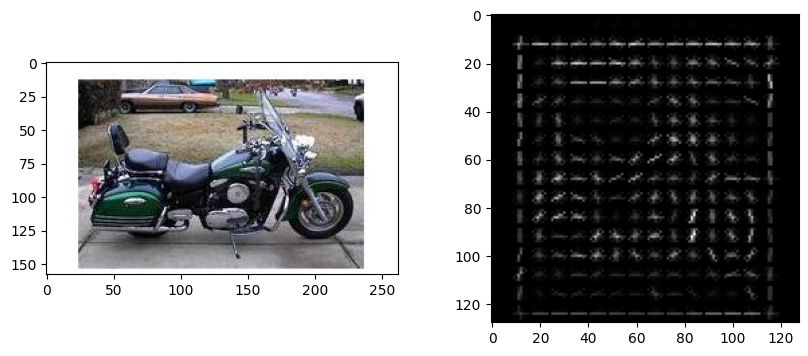

In [33]:
result = svm_classifier.predict([feature_vector])
print('Actual:',label,'     SVM Predicton:',result)
cv2_images_show(2,image_cv,hog_image)

## SVM Predictions

In [34]:
svm_predicted_list=svm_classifier.predict(features_test)

## SVM metrics and Confusion matrix

Confusion Matrix: 
 [[ 95   3   0 ...   0   1   0]
 [  3 100   0 ...   0   0   0]
 [  0   2 106 ...   0   0   0]
 ...
 [  4   0   0 ...   6   0   0]
 [  4   1   0 ...   0   4   0]
 [  9   0   0 ...   0   0   5]]
Accuracy: 0.5137735024048973


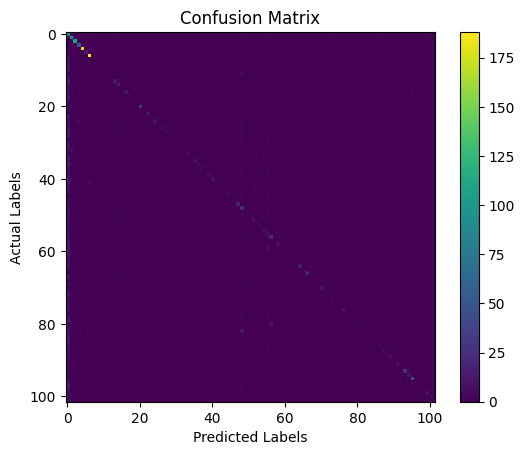

In [35]:
svm_metrics=Calculate_metrics(labels_test,svm_predicted_list)